In [1]:
import os
conversation_dir = "/data2/cs2916_t1/ourllava/our_llava/data_gen/example/prompts/complex_reasoning"
# List to store fewshot samples
fewshot_samples = []

# Get all files in the directory
files = sorted(os.listdir(conversation_dir))

# Filter out only caps and conv files and ensure they are paired
caps_files = [f for f in files if '_caps.txt' in f]
conv_files = [f for f in files if '_conv.txt' in f]

# Ensure the lists are sorted in the same way
caps_files.sort()
conv_files.sort()

# Check if the number of caps and conv files are the same
if len(caps_files) != len(conv_files):
    raise ValueError("The number of _caps.txt and _conv.txt files do not match.")

# Iterate through the paired files and read the content
for caps_file, conv_file in zip(caps_files, conv_files):
    caps_file_path = os.path.join(conversation_dir, caps_file)
    conv_file_path = os.path.join(conversation_dir, conv_file)
    
    with open(caps_file_path, 'r', encoding='utf-8') as caps_file:
        context = caps_file.read().strip()
    with open(conv_file_path, 'r', encoding='utf-8') as conv_file:
        response = conv_file.read().strip()
    
    fewshot_samples.append({"context": context, "response": response})

# Display the fewshot samples to verify
fewshot_samples




[{'context': 'A man wearing multiple neck ties making a goofy face.\nA man in a white shirt wearing very many ties.\na man with ties on poses for a picture\nA man wearing multiple ties on his neck.\nA young man smiles while wearing several ties.\n\ntie: [0.574, 0.298, 0.752, 0.704]\ntie: [0.464, 0.339, 0.639, 0.789]\ntie: [0.349, 0.363, 0.563, 0.732]\ntie: [0.259, 0.255, 0.668, 0.805]\nperson: [0.019, 0.065, 0.962, 0.988]\nperson: [0.0, 0.24, 0.214, 1.0]\ntie: [0.316, 0.778, 0.443, 0.867]\ntie: [0.386, 0.707, 0.496, 0.801]\ntie: [0.251, 0.354, 0.402, 0.747]\ntie: [0.44, 0.318, 0.63, 0.397]\ntie: [0.566, 0.33, 0.655, 0.543]\ntie: [0.25, 0.409, 0.359, 0.556]',
  'response': "Question:\nWhat is unusual about this photo?\n===\nAnswer:\nIn the photo, the man is wearing a total of ten ties around his neck. This is considered unusual because it is not common for someone to wear multiple ties at once. In a typical setting, a person would wear only one tie. The man's goofy facial expression als

In [2]:
messages = [ {"role":"system", "content": f"""You are an AI visual assistant that can analyze a single image. You receive five sentences, each describing the same image you are observing. In addition, specific object locations within the image are given, along with detailed coordinates. These coordinates are in the form of bounding boxes, represented as (x1, y1, x2, y2) with floating numbers ranging from 0 to 1. These values correspond to the top left x, top left y, bottom right x, and bottom right y.

The task is to use the provided caption and bounding box information, create a plausible question about the image, and provide the answer in detail.

Create complex questions beyond describing the scene.
To answer such questions, one should require first understanding the visual content, then based on the background knowledge or reasoning, either explain why the things are happening that way, or provide guides and help to user's request.  Make the question challenging by not including the visual content details in the question so that the user needs to reason about that first.

Instead of directly mentioning the bounding box coordinates, utilize this data to explain the scene using natural language. Include details like object counts, position of the objects, relative position between the objects.  

When using the information from the caption and coordinates, directly explain the scene, and do not mention that the information source is the caption or the bounding box.  Always answer as if you are directly looking at the image."""}
]
for sample in fewshot_samples:
    messages.append({"role":"user", "content":sample['context']})
    messages.append({"role":"assistant", "content":sample['response']} )
# messages.append({"role":"user", "content":'\n'.join(query)})

print(messages)

[{'role': 'system', 'content': "You are an AI visual assistant that can analyze a single image. You receive five sentences, each describing the same image you are observing. In addition, specific object locations within the image are given, along with detailed coordinates. These coordinates are in the form of bounding boxes, represented as (x1, y1, x2, y2) with floating numbers ranging from 0 to 1. These values correspond to the top left x, top left y, bottom right x, and bottom right y.\n\nThe task is to use the provided caption and bounding box information, create a plausible question about the image, and provide the answer in detail.\n\nCreate complex questions beyond describing the scene.\nTo answer such questions, one should require first understanding the visual content, then based on the background knowledge or reasoning, either explain why the things are happening that way, or provide guides and help to user's request.  Make the question challenging by not including the visual 

The IDs of the first 3 images are:
000000000009
000000000025
000000000030


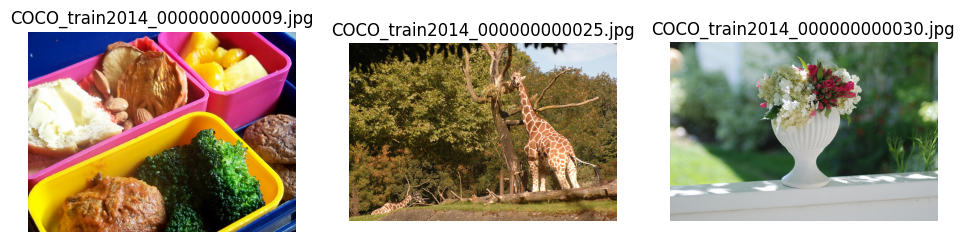

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the train2014 directory
train2014_dir = "/data2/cs2916_t1/coco2014/train2014"

# Get the list of image files in the directory
image_files = sorted([f for f in os.listdir(train2014_dir) if f.endswith('.jpg')])

# Display the first 3 image filenames
first_3_images = image_files[:3]

# Extract the IDs from the filenames
image_ids = [filename.split('_')[-1].split('.')[0] for filename in first_3_images]

# Print the image IDs
print("The IDs of the first 3 images are:")
for image_id in image_ids:
    print(image_id)

# Plot the first 3 images
plt.figure(figsize=(20, 10))
for i, image_file in enumerate(first_3_images):
    img_path = os.path.join(train2014_dir, image_file)
    img = Image.open(img_path)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')

plt.show()


In [4]:
import json
def get_specific_annotation(file_path, image_id):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            # 确保文件内容是一个字典且包含annotations键
            if isinstance(data, dict) and 'annotations' in data:
                annotations = data['annotations']
                specific_annotations = [annotation for annotation in annotations if annotation.get('image_id') == image_id]
                
                if not specific_annotations:
                    print(f"未找到 image_id 为 {image_id} 的注释。")
            else:
                print("JSON文件不包含'annotations'键或不是一个字典。")
    except FileNotFoundError:
        print(f"文件 {file_path} 未找到。")
    except json.JSONDecodeError:
        print(f"文件 {file_path} 不是有效的JSON文件。")
    except Exception as e:
        print(f"读取 {file_path} 时出错: {e}")
    # print (specific_annotations)
    return specific_annotations

def get_size(file_path, image_id):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            # 确保文件内容是一个字典且包含images键
            if isinstance(data, dict) and 'images' in data:
                images = data['images']
                specific_images = [image for image in images if image.get('id') == image_id]
                
                if not specific_images:
                    print(f"未找到 image_id 为 {image_id} 的images。")
            else:
                print("JSON文件不包含'images'键或不是一个字典。")
    except FileNotFoundError:
        print(f"文件 {file_path} 未找到。")
    except json.JSONDecodeError:
        print(f"文件 {file_path} 不是有效的JSON文件。")
    except Exception as e:
        print(f"读取 {file_path} 时出错: {e}")
    # print (specific_annotations)
    return specific_images



def get_categories(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            # 确保文件内容是一个字典且包含categories键
            if isinstance(data, dict) and 'categories' in data:
                categories = data['categories']
                # print(categories)
            else:
                print("JSON文件不包含'annotations'键或不是一个字典。")
    except FileNotFoundError:
        print(f"文件 {file_path} 未找到。")
    except json.JSONDecodeError:
        print(f"文件 {file_path} 不是有效的JSON文件。")
    except Exception as e:
        print(f"读取 {file_path} 时出错: {e}")
    return categories
    # print (specific_annotations)

In [5]:
import openai
import unicodedata
from openai import OpenAI
caption_json_file_path = '/data2/cs2916_t1/coco2014/annotations/captions_train2014.json'
json_file_path = '/data2/cs2916_t1/coco2014/annotations/instances_train2014.json'
size_file_path='/data2/cs2916_t1/coco2014/annotations/image_info_test2014.json'


id_name_dict = {item["id"]: item["name"] for item in get_categories(json_file_path)}

# 打印结果
print(id_name_dict)
for image_id in image_ids:
    # print(image_id)
    # Extract captions
    __size__=get_size(caption_json_file_path, int(image_id))
    height=__size__[0]['height']
    width=__size__[0]['width']
    __annotations__=get_specific_annotation(json_file_path, int(image_id))
    captions = [item['caption'] for item in get_specific_annotation(caption_json_file_path, int(image_id))] 
    bounding_boxes = [item['bbox'] for item in __annotations__]  
    category_ids = [item['category_id'] for item in __annotations__]  
    # hei
    # Join captions into the desired format
    captions_text = "\n".join(captions)
    # print (captions_text)
    normalized_bounding_boxes = [
        [x / width, y / height, (x + w) / width, (y + h) / height]
        for (x, y, w, h) in bounding_boxes
    ]
    now_messages = [captions_text]
    for i, bbox in enumerate(normalized_bounding_boxes):
        category_name = id_name_dict.get(category_ids[i], "unknown")
        bbox_text = f"{category_name}: [{bbox[0]:.3f}, {bbox[1]:.3f}, {bbox[2]:.3f}, {bbox[3]:.3f}]"
        now_messages.append(bbox_text)
    prompt=messages.copy()
    prompt.append({"role":"user","content":"\n".join(now_messages)})
    # with open('prompt.json', 'w', encoding='utf-8') as f:
    #     json.dump(prompt, f, ensure_ascii=False, indent=4)
    # 打印归一化后的边界框和类别
    # print("---------------------")    
    openai.api_key = YOUR_API_KEY
    openai.api_base = YOUR_API_BASE
    # # print(openai.api_base)
    client = OpenAI(
        api_key=openai.api_key,
        base_url=openai.api_base
    )
    # prompt=messages.copy()
    # # print(messages)
    # # print("---------------------")
    # prompt.append({"role":"user","content":captions_text})
    # # print(prompt)
    # # from pprint import pprint
    # print(prompt)
    completion = client.chat.completions.create(
    model="gpt-3.5-turbo-1106",
    messages=prompt
    )

    print(completion.choices[0].message)    
    content = unicodedata.normalize('NFKC', completion.choices[0].message.content)
    print(content)  
    
    
    
    
    
    
    
    
    # messages.append({"role":"user", "content":'\n'.join(query)})
    

{1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'micro